In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [4]:
df = pd.read_csv("../data/superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 21)

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])


In [8]:
df[["Order Date", "Ship Date"]].dtypes


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

Are we growing revenue, and is profit growing with it?


In [9]:
yearly = (
    df.groupby(df["Order Date"].dt.year)
      .agg(
          Sales=("Sales", "sum"),
          Profit=("Profit", "sum")
      )
      .reset_index()
)

yearly


,Order Date,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


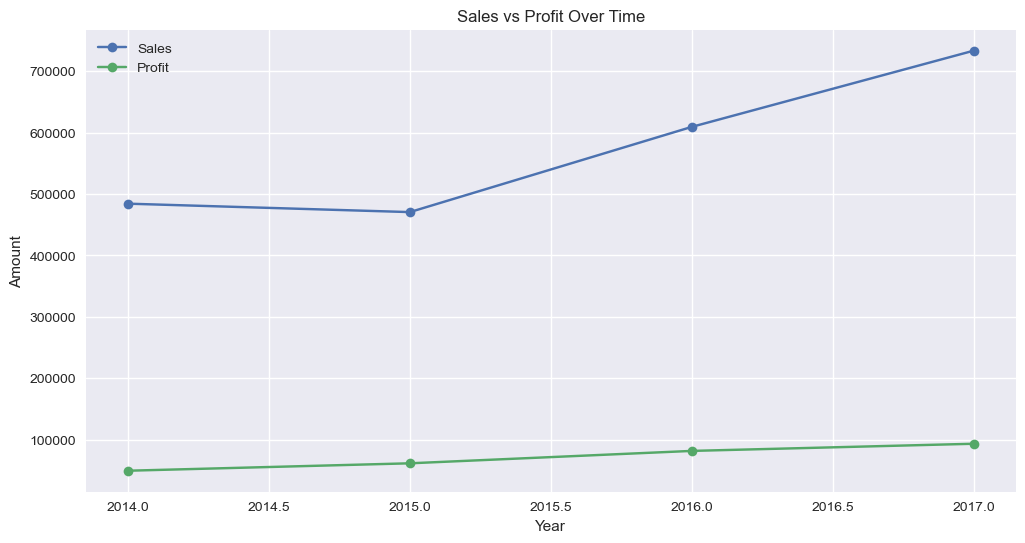

In [10]:
plt.figure(figsize=(12,6))
plt.plot(yearly["Order Date"], yearly["Sales"], marker="o", label="Sales")
plt.plot(yearly["Order Date"], yearly["Profit"], marker="o", label="Profit")

plt.title("Sales vs Profit Over Time")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.show()


Sales declined slightly in 2015, but profit increased, indicating improved cost efficiency.

From 2016 onwards, both sales and profit increased, showing healthy growth.

Profit growth is slower than sales growth, suggesting margin pressure as the business scales.

This indicates that while growth is strong, profitability depends on operational decisions such as discounting.


In [11]:
df[["Discount", "Sales", "Profit"]].describe()


,Discount,Sales,Profit
count,9994.000000,9994.000000,9994.000000
mean,0.156203,229.858001,28.656896
std,0.206452,623.245101,234.260108
min,0.000000,0.444000,-6599.978000
25%,0.000000,17.280000,1.728750
50%,0.200000,54.490000,8.666500
75%,0.200000,209.940000,29.364000
max,0.800000,22638.480000,8399.976000


In [12]:
df["Discount"].value_counts().sort_index()


Discount
0.00    4798
0.10      94
0.15      52
0.20    3657
0.30     227
0.32      27
0.40     206
0.45      11
0.50      66
0.60     138
0.70     418
0.80     300
Name: count, dtype: int64

In [13]:
discount_analysis = (
    df.groupby("Discount")
      .agg(
          Sales=("Sales", "sum"),
          Profit=("Profit", "sum"),
          Orders=("Order ID", "count")
      )
      .reset_index()
)

discount_analysis


,Discount,Sales,Profit,Orders
0,0.00,1.087908e+06,320987.6032,4798
1,0.10,5.436935e+04,9029.1770,94
2,0.15,2.755852e+04,1418.9915,52
3,0.20,7.645944e+05,90337.3060,3657
4,0.30,1.032267e+05,-10369.2774,227
5,0.32,1.449346e+04,-2391.1377,27
6,0.40,1.164178e+05,-23057.0504,206
7,0.45,5.484974e+03,-2493.1111,11
8,0.50,5.891854e+04,-20506.4281,66
9,0.60,6.644700e+03,-5944.6552,138


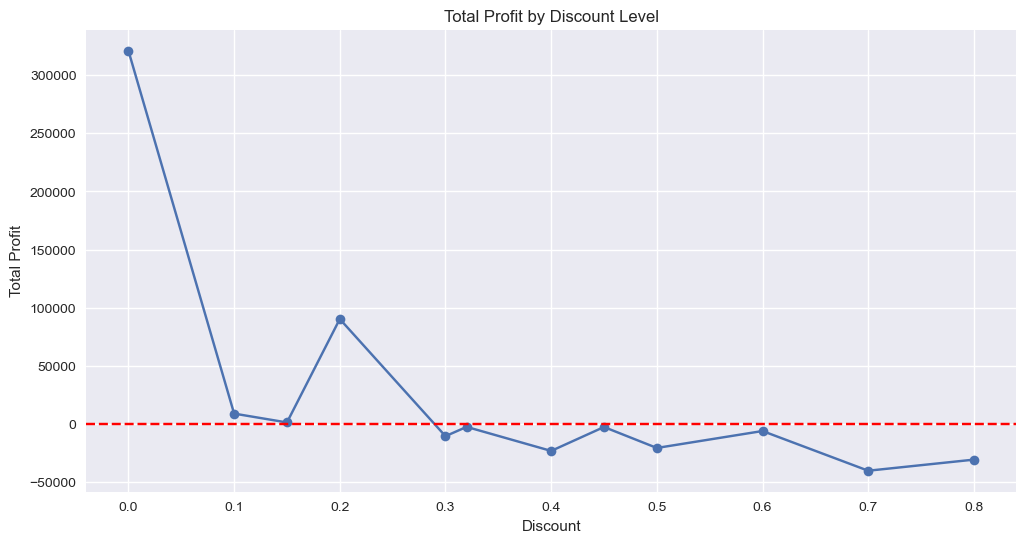

In [14]:
plt.figure(figsize=(12,6))
plt.plot(discount_analysis["Discount"], discount_analysis["Profit"], marker="o")
plt.axhline(0, color="red", linestyle="--")

plt.title("Total Profit by Discount Level")
plt.xlabel("Discount")
plt.ylabel("Total Profit")
plt.show()


0% discount = massive profit → this is your baseline

10–20% discount = still profitable but sharply lower

~30% = break-even / zero-profit zone

≥40% discount = consistent losses

70–80% = absolute profit destruction

In [15]:
discount_analysis["Profit_per_Order"] = (
    discount_analysis["Profit"] / discount_analysis["Orders"]
)

discount_analysis


,Discount,Sales,Profit,Orders,Profit_per_Order
0,0.00,1.087908e+06,320987.6032,4798,66.900292
1,0.10,5.436935e+04,9029.1770,94,96.055074
2,0.15,2.755852e+04,1418.9915,52,27.288298
3,0.20,7.645944e+05,90337.3060,3657,24.702572
4,0.30,1.032267e+05,-10369.2774,227,-45.679636
5,0.32,1.449346e+04,-2391.1377,27,-88.560656
6,0.40,1.164178e+05,-23057.0504,206,-111.927429
7,0.45,5.484974e+03,-2493.1111,11,-226.646464
8,0.50,5.891854e+04,-20506.4281,66,-310.703456
9,0.60,6.644700e+03,-5944.6552,138,-43.077212


Discounts above 30% have structurally negative unit economics and should only be used for inventory liquidation or customer acquisition, not revenue growth.

In [16]:
loss_drivers = (
    df.groupby(["Category", "Discount"])
      .agg(
          Sales=("Sales", "sum"),
          Profit=("Profit", "sum"),
          Orders=("Order ID", "nunique")
      )
      .reset_index()
)

loss_drivers.sort_values("Profit").head(10)


,Category,Discount,Sales,Profit,Orders
15,Office Supplies,0.8,16963.756,-30539.0392,250
22,Technology,0.7,15601.509,-19579.3191,22
14,Office Supplies,0.7,22559.391,-16601.0984,323
6,Furniture,0.4,45614.406,-16187.3968,72
8,Furniture,0.5,20983.470,-12871.1990,53
4,Furniture,0.3,99470.350,-10695.3169,207
21,Technology,0.5,37935.070,-7635.2291,11
20,Technology,0.4,70803.378,-6869.6536,118
9,Furniture,0.6,6644.700,-5944.6552,127
10,Furniture,0.7,2459.382,-3894.9394,15


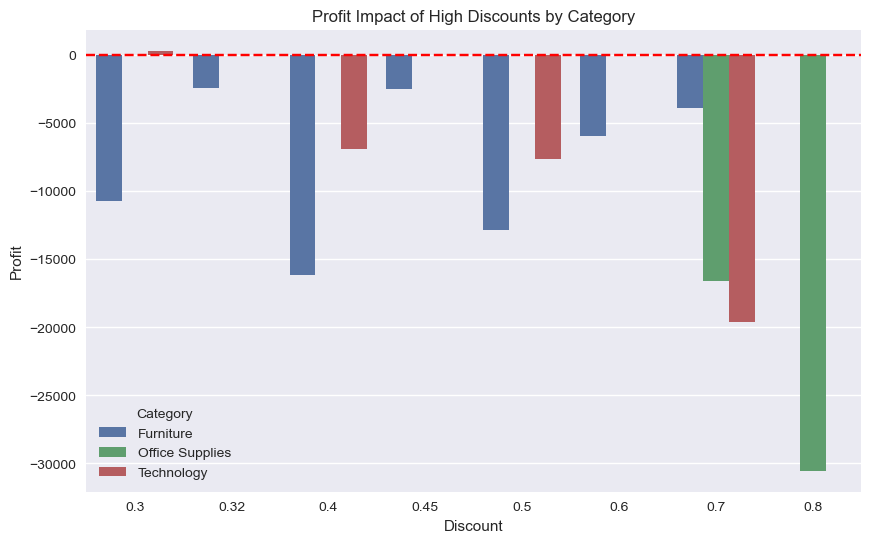

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=loss_drivers[loss_drivers["Discount"] >= 0.3],
    x="Discount",
    y="Profit",
    hue="Category"
)
plt.title("Profit Impact of High Discounts by Category")
plt.axhline(0, color="red", linestyle="--")
plt.show()


In [18]:
df["High_Discount"] = df["Discount"].apply(lambda x: ">=30%" if x >= 0.3 else "<30%")

bucket_analysis = (
    df.groupby(["Category", "High_Discount"])
      .agg(
          Sales=("Sales", "sum"),
          Profit=("Profit", "sum"),
          Orders=("Order ID", "nunique")
      )
      .reset_index()
)

bucket_analysis


,Category,High_Discount,Sales,Profit,Orders
0,Furniture,<30%,546849.0545,72929.0289,1343
1,Furniture,>=30%,195150.7408,-54477.7561,475
2,Office Supplies,<30%,679523.8850,169630.9384,3444
3,Office Supplies,>=30%,39523.1470,-47140.1376,573
4,Technology,<30%,708057.7710,179213.1104,1423
5,Technology,>=30%,128096.2620,-33758.1623,152


Furniture

<30% discount → +72.9k profit on 1,343 orders

≥30% discount → −54.5k loss on just 475 orders
 Discounts don’t drive enough volume to justify margin loss.

Office Supplies

<30% discount → +169.6k profit

≥30% discount → −47.1k loss
 Highest absolute loss at high discounts → worst offender.

Technology

<30% discount → +179.2k profit

≥30% discount → −33.8k loss
 Strong category until aggressive discounting starts.